# Theorem 10.5.2 for Truncated Normal Distribution

## General Normal Distribution

In [5]:
from sympy import *
t = Symbol('t')
x = Symbol('x')
m = Symbol('mu')
s = Symbol('sigma')

def nPDF(x,mu,sigma):
  return((exp(-(x-mu)**2/(2*sigma**2))/(sigma*sqrt(2*pi))))
def nCDF(x,mu,sigma):
  return(integrate(nPDF(t,mu,sigma),(t,-oo,x)))

## Truncated Normal Disctribution in (0,1)

In [6]:
def PDF(x,mu,sigma):
  return(Piecewise(
  (0,(x<=0)),
  (nPDF(x,mu,sigma)/(nCDF(1,mu,sigma)-nCDF(0,mu,sigma)),(x<1)),
  (0,(x>=1))))
def CDF(x,mu,sigma):
  return(integrate(PDF(t,mu,sigma),(t,0,x)))

## Calculate the function in the interval

In [10]:
import numpy as np

mu = 0.2
sigma = 0.1
X = np.linspace(0,1,50)
Y = []
for xx in X:
  Y.append(diff(((1-CDF(x,mu,sigma))/PDF(x,mu,sigma)),x).subs(x,xx))

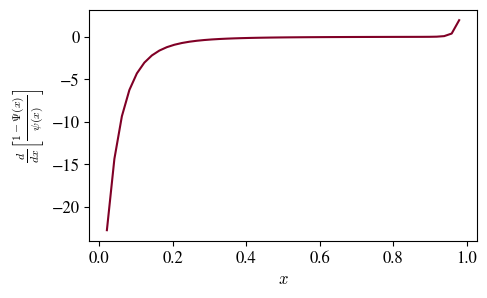

In [13]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.figure(figsize=(5,3))

plt.plot(X[1:49],Y[1:49],color='#800026')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$\frac{d}{dx} \left[ \frac{1-\Psi(x)}{\psi(x)} \right]$', fontsize=12)
plt.savefig('Thesis_MS_ScientificComputing_FlorezCoronel_JuanE/images/th1052_gumbel_verify.png', transparent=True, bbox_inches = 'tight',dpi=1000)